In [1]:
import pandas as pd

# Load the uploaded CSV file
data = pd.read_csv('BITRE_Fatality_Count_By_Date-Table 1.csv')

# Display the first few rows of the dataset to understand its structure
data.head()


,Date,Number Fatalities,Year,Month,Day Of Week
0,1-Jan-90,10,1990,Jan,Monday
1,2-Jan-90,2,1990,Jan,Tuesday
2,3-Jan-90,7,1990,Jan,Wednesday
3,4-Jan-90,4,1990,Jan,Thursday
4,5-Jan-90,4,1990,Jan,Friday


In [2]:
data.head()

,Date,Number Fatalities,Year,Month,Day Of Week
0,1-Jan-90,10,1990,Jan,Monday
1,2-Jan-90,2,1990,Jan,Tuesday
2,3-Jan-90,7,1990,Jan,Wednesday
3,4-Jan-90,4,1990,Jan,Thursday
4,5-Jan-90,4,1990,Jan,Friday


In [2]:

import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from tbats import TBATS

# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%d-%b-%y')

# Convert daily fatalities data to monthly data by resampling and summing up the fatalities for each month
monthly_data = data.resample('M', on='Date').sum()

# Keep only the 'Number Fatalities' column and rename for clarity
monthly_data = monthly_data[['Number Fatalities']]
monthly_data.rename(columns={'Number Fatalities': 'Monthly Fatalities'}, inplace=True)


/var/folders/3l/xh28kn0j7_7d5hh7fgz188940000gn/T/ipykernel_3516/1528574853.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data.resample('M', on='Date').sum()


In [3]:
monthly_data

,Monthly Fatalities
Date,
1990-01-31,174
1990-02-28,166
1990-03-31,221
1990-04-30,175
1990-05-31,186
...,...
2023-12-31,120
2024-01-31,98
2024-02-29,113


/Users/amin/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/amin/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/amin/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/amin/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pa

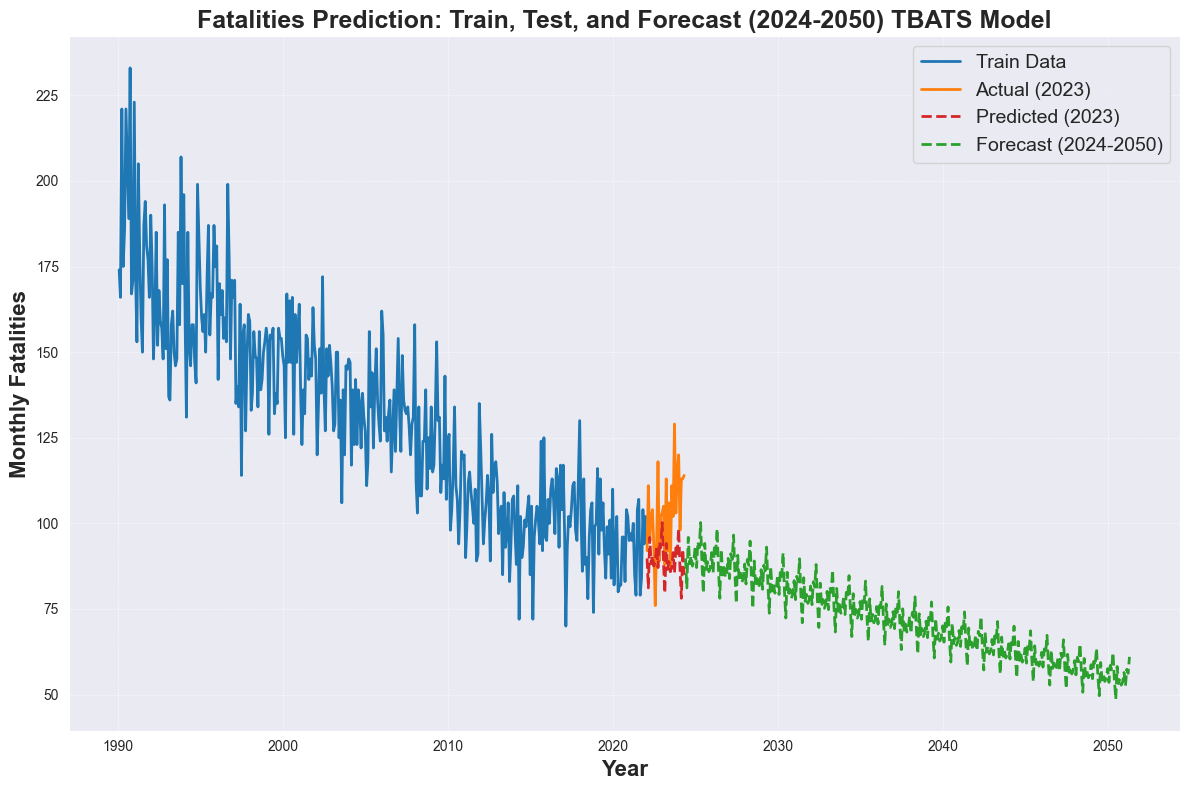

MAPE: 13.96%
MAE: 15.19
MSE: 354.12
RMSE: 18.82


In [5]:
train_data = monthly_data[monthly_data.index.year <= 2021]
test_data = monthly_data[monthly_data.index.year >= 2022] 

# Fit the TBATS model
tbats_model = TBATS(seasonal_periods=[12])  # Monthly data, so 12 periods for yearly seasonality
tbats_fit = tbats_model.fit(train_data['Monthly Fatalities'])

# Make predictions for the test set (2023)
predicted_values_2023 = tbats_fit.forecast(steps=len(test_data))

# Forecast until 2050
forecast_2050_steps = (2050 - 2023) * 12
forecast_values_2050 = tbats_fit.forecast(steps=forecast_2050_steps)

# Extract actual values for 2023
actual_values_2023 = test_data['Monthly Fatalities']

# Calculate evaluation metrics for 2023 predictions
mae = mean_absolute_error(actual_values_2023, predicted_values_2023)
mse = mean_squared_error(actual_values_2023, predicted_values_2023)
rmse = np.sqrt(mse)

# Plot actual vs predicted values for 2023 and forecast until 2050
plt.figure(figsize=(12, 8))

# Plot training set
plt.plot(train_data.index, train_data['Monthly Fatalities'], label='Train Data', color='#1f77b4', linestyle='-', linewidth=2)

# Plot test set (actual 2023 values)
plt.plot(actual_values_2023.index, actual_values_2023, label='Actual (2023)', color='#ff7f0e', linestyle='-', linewidth=2)

# Plot predicted 2023 values
test_index = pd.date_range(start=test_data.index[0], periods=len(test_data), freq='M')
plt.plot(test_index, predicted_values_2023, label='Predicted (2023)', color='#d62728', linestyle='--', linewidth=2)

# Plot forecast until 2050
forecast_index = pd.date_range(start=test_index[-1] + pd.offsets.MonthBegin(1), periods=forecast_2050_steps, freq='M')
plt.plot(forecast_index, forecast_values_2050, label='Forecast (2024-2050)', color='#2ca02c', linestyle='--', linewidth=2)

# Customize the plot: title, axes labels, grid, and legend
plt.title('Fatalities Prediction: Train, Test, and Forecast (2024-2050) TBATS Model', fontsize=18, fontweight='bold')
plt.xlabel('Year', fontsize=16, fontweight='bold')
plt.ylabel('Monthly Fatalities', fontsize=16, fontweight='bold')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(fontsize=14, frameon=True, loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

# Calculate MAPE
mape = np.mean(np.abs((actual_values_2023 - predicted_values_2023) / actual_values_2023)) * 100

# Print evaluation metrics for 2023
print(f'MAPE: {mape:.2f}%')
print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')

ETS

/var/folders/3l/xh28kn0j7_7d5hh7fgz188940000gn/T/ipykernel_2631/874128421.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  train_data = train_data.asfreq('M')
/var/folders/3l/xh28kn0j7_7d5hh7fgz188940000gn/T/ipykernel_2631/874128421.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  test_data = test_data.asfreq('M')
/var/folders/3l/xh28kn0j7_7d5hh7fgz188940000gn/T/ipykernel_2631/874128421.py:45: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  test_index = pd.date_range(start=test_data.index[0], periods=len(test_data), freq='M')
/var/folders/3l/xh28kn0j7_7d5hh7fgz188940000gn/T/ipykernel_2631/874128421.py:49: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=test_index[-1] + pd.offsets.MonthBegin(1), periods=forecast_2050_steps, freq='

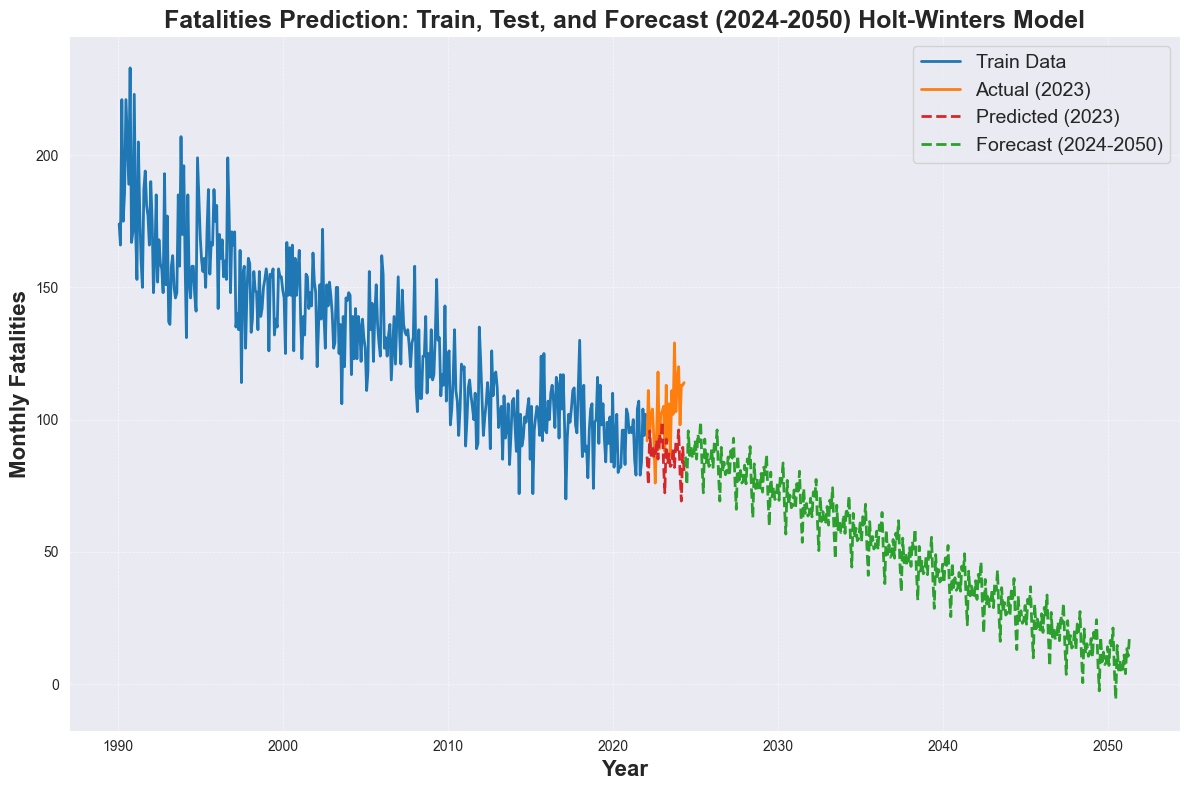

MAPE: 16.62%
MAE: 17.99
MSE: 473.43
RMSE: 21.76


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Split the data into training and testing sets
train_data = monthly_data[monthly_data.index.year <= 2021]
test_data = monthly_data[monthly_data.index.year >= 2022]

# Ensure the data has a monthly frequency
train_data = train_data.asfreq('M')
test_data = test_data.asfreq('M')

# Fit the Holt-Winters Exponential Smoothing model
holt_winters_model = ExponentialSmoothing(train_data['Monthly Fatalities'], 
                                          trend='add', seasonal='add', seasonal_periods=12)
holt_winters_fit = holt_winters_model.fit()

# Make predictions for the test set (2023)
predicted_values_2023 = holt_winters_fit.forecast(steps=len(test_data))

# Forecast until 2050 (using the fitted model)
forecast_2050_steps = (2050 - 2023) * 12
forecast_values_2050 = holt_winters_fit.forecast(steps=forecast_2050_steps)

# Extract actual values for 2023
actual_values_2023 = test_data['Monthly Fatalities']

# Calculate evaluation metrics for 2023 predictions
mae = mean_absolute_error(actual_values_2023, predicted_values_2023)
mse = mean_squared_error(actual_values_2023, predicted_values_2023)
rmse = np.sqrt(mse)

# Plot actual vs predicted values for 2023 and forecast until 2050
plt.figure(figsize=(12, 8))

# Plot training set
plt.plot(train_data.index, train_data['Monthly Fatalities'], label='Train Data', color='#1f77b4', linestyle='-', linewidth=2)

# Plot test set (actual 2023 values)
plt.plot(actual_values_2023.index, actual_values_2023, label='Actual (2023)', color='#ff7f0e', linestyle='-', linewidth=2)

# Plot predicted 2023 values
test_index = pd.date_range(start=test_data.index[0], periods=len(test_data), freq='M')
plt.plot(test_index, predicted_values_2023, label='Predicted (2023)', color='#d62728', linestyle='--', linewidth=2)

# Plot forecast until 2050
forecast_index = pd.date_range(start=test_index[-1] + pd.offsets.MonthBegin(1), periods=forecast_2050_steps, freq='M')
plt.plot(forecast_index, forecast_values_2050, label='Forecast (2024-2050)', color='#2ca02c', linestyle='--', linewidth=2)

# Customize the plot: title, axes labels, grid, and legend
plt.title('Fatalities Prediction: Train, Test, and Forecast (2024-2050) Holt-Winters Model', fontsize=18, fontweight='bold')
plt.xlabel('Year', fontsize=16, fontweight='bold')
plt.ylabel('Monthly Fatalities', fontsize=16, fontweight='bold')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(fontsize=14, frameon=True, loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

# Calculate MAPE
mape = np.mean(np.abs((actual_values_2023 - predicted_values_2023) / actual_values_2023)) * 100

# Print evaluation metrics for 2023
print(f'MAPE: {mape:.2f}%')
print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')

tetha

/var/folders/3l/xh28kn0j7_7d5hh7fgz188940000gn/T/ipykernel_3233/2406562801.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data.resample('M', on='Date').sum()
/var/folders/3l/xh28kn0j7_7d5hh7fgz188940000gn/T/ipykernel_3233/2406562801.py:50: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  test_index = pd.date_range(start=test_data.index[0], periods=len(test_data), freq='M')
/var/folders/3l/xh28kn0j7_7d5hh7fgz188940000gn/T/ipykernel_3233/2406562801.py:54: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=test_index[-1] + pd.offsets.MonthBegin(1), periods=forecast_2050_steps, freq='M')


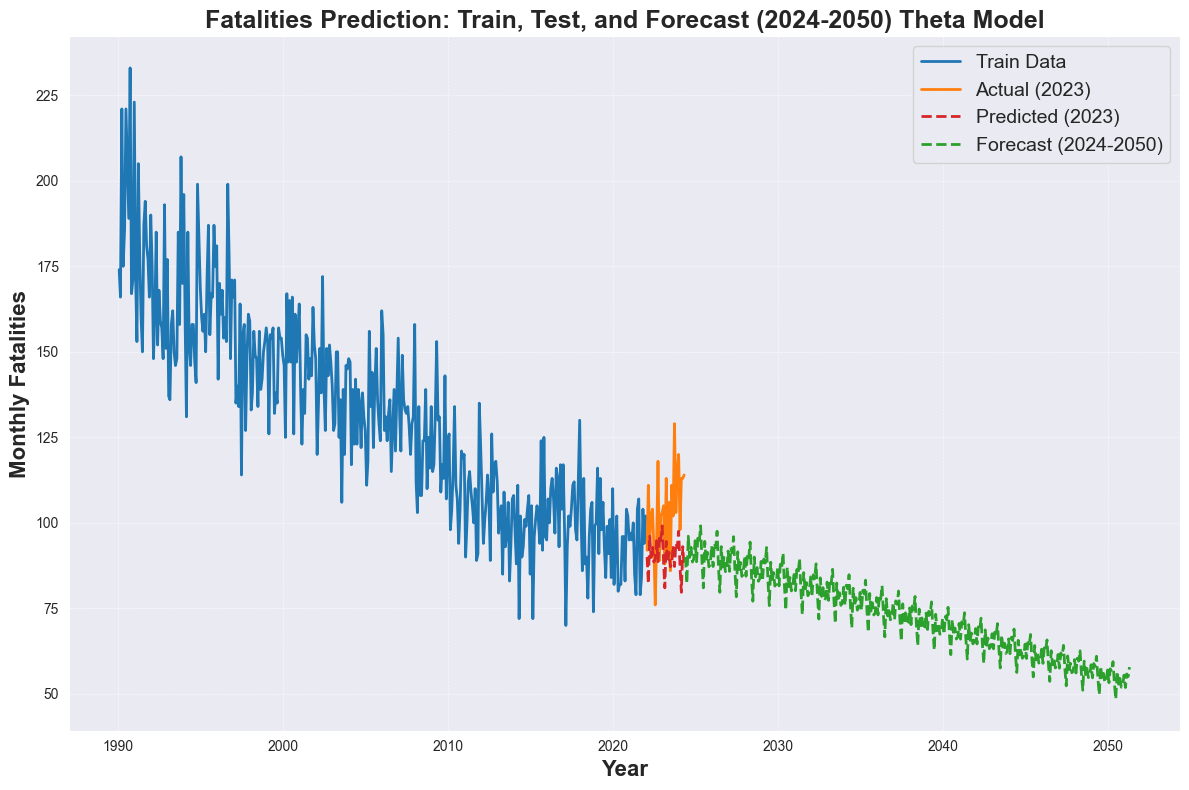

MAPE: 13.11%
MAE: 14.28
MSE: 319.32
RMSE: 17.87


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from statsmodels.tsa.forecasting.theta import ThetaModel

# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%d-%b-%y')

# Convert daily fatalities data to monthly data by resampling and summing up the fatalities for each month
monthly_data = data.resample('M', on='Date').sum()

# Keep only the 'Number Fatalities' column and rename for clarity
monthly_data = monthly_data[['Number Fatalities']]
monthly_data.rename(columns={'Number Fatalities': 'Monthly Fatalities'}, inplace=True)

# Split the data into training and test sets
train_data = monthly_data[monthly_data.index.year <= 2021]
test_data = monthly_data[monthly_data.index.year >= 2022]

# Fit the Theta model
theta_model = ThetaModel(train_data['Monthly Fatalities'], period=12)  # Monthly data, so yearly seasonality
theta_fit = theta_model.fit()

# Make predictions for the test set (2023)
predicted_values_2023 = theta_fit.forecast(steps=len(test_data))

# Forecast until 2050
forecast_2050_steps = (2050 - 2023) * 12
forecast_values_2050 = theta_fit.forecast(steps=forecast_2050_steps)

# Extract actual values for 2023
actual_values_2023 = test_data['Monthly Fatalities']

# Calculate evaluation metrics for 2023 predictions
mae = mean_absolute_error(actual_values_2023, predicted_values_2023)
mse = mean_squared_error(actual_values_2023, predicted_values_2023)
rmse = np.sqrt(mse)

# Plot actual vs predicted values for 2023 and forecast until 2050
plt.figure(figsize=(12, 8))

# Plot training set
plt.plot(train_data.index, train_data['Monthly Fatalities'], label='Train Data', color='#1f77b4', linestyle='-', linewidth=2)

# Plot test set (actual 2023 values)
plt.plot(actual_values_2023.index, actual_values_2023, label='Actual (2023)', color='#ff7f0e', linestyle='-', linewidth=2)

# Plot predicted 2023 values
test_index = pd.date_range(start=test_data.index[0], periods=len(test_data), freq='M')
plt.plot(test_index, predicted_values_2023, label='Predicted (2023)', color='#d62728', linestyle='--', linewidth=2)

# Plot forecast until 2050
forecast_index = pd.date_range(start=test_index[-1] + pd.offsets.MonthBegin(1), periods=forecast_2050_steps, freq='M')
plt.plot(forecast_index, forecast_values_2050, label='Forecast (2024-2050)', color='#2ca02c', linestyle='--', linewidth=2)

# Customize the plot: title, axes labels, grid, and legend
plt.title('Fatalities Prediction: Train, Test, and Forecast (2024-2050) Theta Model', fontsize=18, fontweight='bold')
plt.xlabel('Year', fontsize=16, fontweight='bold')
plt.ylabel('Monthly Fatalities', fontsize=16, fontweight='bold')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(fontsize=14, frameon=True, loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

# Calculate MAPE
mape = np.mean(np.abs((actual_values_2023 - predicted_values_2023) / actual_values_2023)) * 100

# Print evaluation metrics for 2023
print(f'MAPE: {mape:.2f}%')
print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
